## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

Выполнила Шеневская Влада

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",
                sep=',')

In [3]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [4]:
df.shape

(1000, 21)

In [5]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.


In [6]:
df.isna().sum() # нет пропусков

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Разделим изначально признаки по 3 группам: строковые (могут быть и категориальными, и порядковыми), количественные, строковые бинарные переменные.

In [7]:
for name in df.columns:
        s = ''
        s += name
        if type(df[name][0]) == str:
            s += ' строка'
        if type(df[name][0]) != str:
            s += ' количественная переменная'
        if df[name].nunique() < 3:
            s += ', бинарная переменная'
        if s != name:
            print(s)
# функция кодировки взята из этого ноутбука: https://github.com/Dyakonov/python_hacks/blob/master/dj_cat_coding.ipynb            

status строка
duration количественная переменная
credit_history строка
purpose строка
amount количественная переменная
savings строка
employment_duration строка
installment_rate строка
personal_status_sex строка
other_debtors строка
present_residence строка
property строка
age количественная переменная
other_installment_plans строка
housing строка
number_credits строка
job строка
people_liable строка, бинарная переменная
telephone строка, бинарная переменная
foreign_worker строка, бинарная переменная
credit_risk строка, бинарная переменная


Отсюда, проведя еще повторную проверку, были отобраны следующие признаки по категориям:

In [8]:
print('Количественные признаки:', 'duration', 'amount', 'age', sep='\n')
print()
print('Бинарные признаки:', 'foreign_worker', 'credit_risk',
      'telephone', sep='\n')
print()
print('Порядковые признаки: ', 'number_credits', 'present_residence',
      'installment_rate','employment_duration', 
      'status', 'savings', 'people_liable', sep='\n')
print()
print('Категориальные признаки:', 'job', 'housing', 'purpose', 'property',
                 'other_installment_plans', 'other_debtors','credit_history', 'personal_status_sex',
      sep='\n')

Количественные признаки:
duration
amount
age

Бинарные признаки:
foreign_worker
credit_risk
telephone

Порядковые признаки: 
number_credits
present_residence
installment_rate
employment_duration
status
savings
people_liable

Категориальные признаки:
job
housing
purpose
property
other_installment_plans
other_debtors
credit_history
personal_status_sex


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
df.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
print(f"Процент клиентов моложе 30, снимающих жилье: {round((df[(df.age < 30) & (df.housing == 'rent')]['housing'].count())/(df[df.age < 30]['housing'].count()), 3)*100}%")
print(f"Процент клиентов 40+, снимающих жилье: {round((df[(df.age > 40) & (df.housing == 'rent')]['housing'].count())/(df[df.age > 40]['housing'].count()), 3)*100}%")

Процент клиентов моложе 30, снимающих жилье: 66.7%
Процент клиентов 40+, снимающих жилье: 68.0%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
df.groupby('number_credits')['foreign_worker'].value_counts()

number_credits  foreign_worker
1               no                608
                yes                25
2-3             no                322
                yes                11
4-5             no                 27
                yes                 1
>= 6            no                  6
Name: foreign_worker, dtype: int64

In [12]:
print(f"Количество иностранцев, у которых число кредитов больше трех: {(df[(df.foreign_worker == 'yes') & (df.number_credits == '4-5')]['number_credits'].count())}")

Количество иностранцев, у которых число кредитов больше трех: 1


### Задание 6 (1 балл)

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

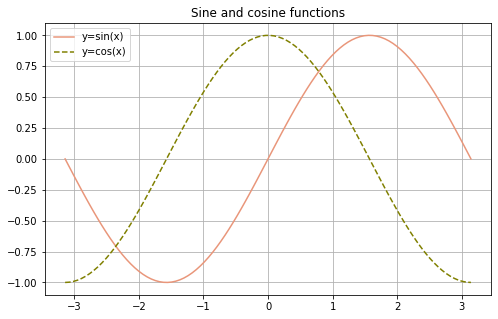

In [13]:
x = np.linspace(-np.pi, np.pi, 100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, np.sin(x), color='darksalmon', label='y=sin(x)')
ax.plot(x, np.cos(x), linestyle='dashed', color='olive', label='y=cos(x)')
ax.legend()
ax.set_title('Sine and cosine functions')
ax.grid()

Просто красивый график синусоиды и косинусоиды.

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта с помощью зеркальных горизонтальных гистограмм.

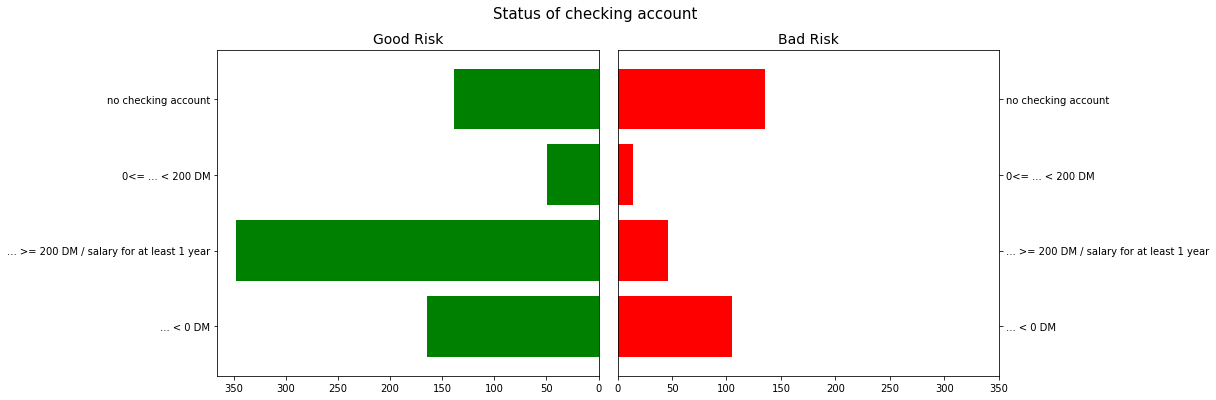

In [14]:
df1 = pd.DataFrame(df[df['credit_risk'] == 'good']['status'].value_counts()).reindex(['... < 0 DM',
             '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM',
             'no checking account'])
df2 = pd.DataFrame(df[df['credit_risk'] != 'good']['status'].value_counts()).reindex(['... < 0 DM',
             '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM',
             'no checking account'])

fig = plt.figure(figsize=(14, 6))
fig.suptitle('Status of checking account', fontsize=15)
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Good Risk', fontsize=14)
df1.plot.barh(ax=ax1, color='green', width=0.8, legend=None).invert_xaxis()
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim(0, 350)
ax2.set_title('Bad Risk', fontsize=14)
df2.plot.barh(ax=ax2, color='red', width=0.8, legend=None).yaxis.set_ticks_position("right")
plt.subplots_adjust(wspace = 0.05)

На данном графике изображено соотношение клиентов с хорошим и плохим кредитным риском в разбивке по категориям статуса текущего счета. Можно заметить что наивысший плохой кредитный риск у тех клиентов, что не имеют текущего счета или на нем очень маленький остаток ('... < 0 DM'). Тогда как клиенты у которых достаточно средств на счете ('... >= 200 DM / salary for at least 1 year') с имеют наиболее хорошую оценку возврата долга.

### Задание 8  (0.5 балла)

Теперь рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn и более классических гистограмм. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

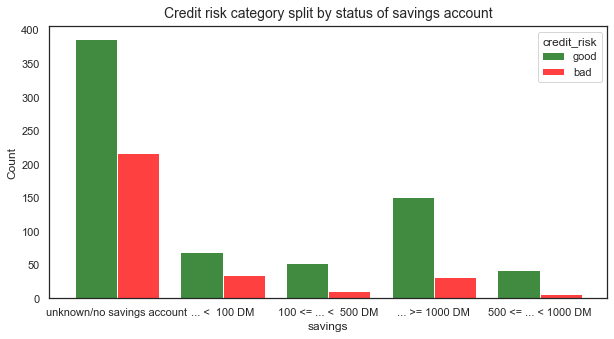

In [15]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white", {'axes.grid' : False})
sns.histplot(data=df, x='savings', multiple="dodge", hue='credit_risk', shrink=0.8,
             palette=["darkgreen", "red"]).set_title('Credit risk category split by status of savings account', 
                                                     fontsize=14, y= 1.01)
plt.show()

На данной гистограмме изображена разбивка клиентов с плохим и хорошим кредитным риском в зависимости от статуса счета сбережений. Больше всего клиентов, у которых неизвестно состояние счета сбережений (как и тех у кого хороший кредитный скоринг, так и у тех, что имеют плохую оценку кредитного скоринга). 

Конечно, этот способ построения намного проще, но для восприятия результата, возможно, приятнее график из задания 7.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

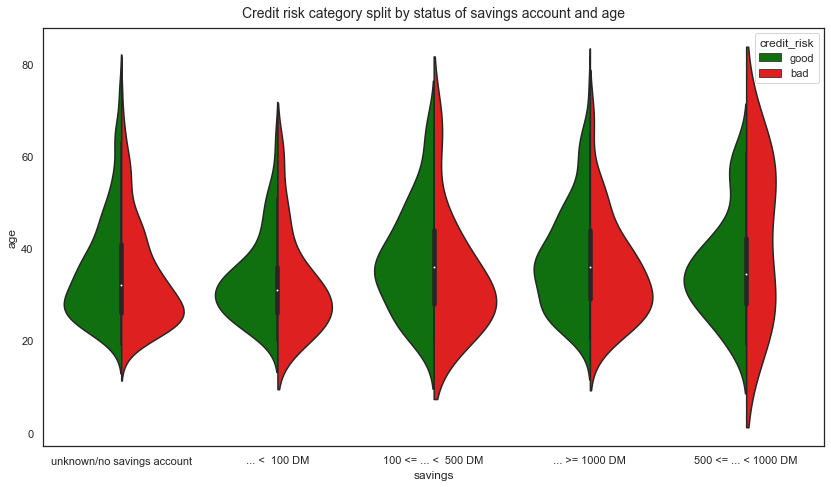

In [16]:
sns.set(rc={'figure.figsize':(14, 7.7)})
sns.set_style("white", {'axes.grid' : False})

sns.violinplot(x='savings', y='age', hue='credit_risk', data=df,
                    palette=["green", "red"],
               split=True).set_title('Credit risk category split by status of savings account and age', 
                                                     fontsize=14, y= 1.01)
plt.show()

На этой скрипичной диаграмме можно увидеть, что у тех у кого неизвестен статус счета сбережений чаще всего встречаются клиенты возраста 28-35 лет среди обеих категорий, тогда как среди клиентов, у которых сумма на счете сбережений 100 DM <= ... < 500 DM среди клиентов с хороших кредитным риском чаще всего встречаются те, кому 38-40 лет. Среди клиентов с большим уровнем сбережений сложно оценить возраст тех, у кого плохая оценка кредитного скоринга, тогда как касательно клиентов с низкими рисками дефолта чаще всего в данной категории встречаются те, кому 35-38 лет.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

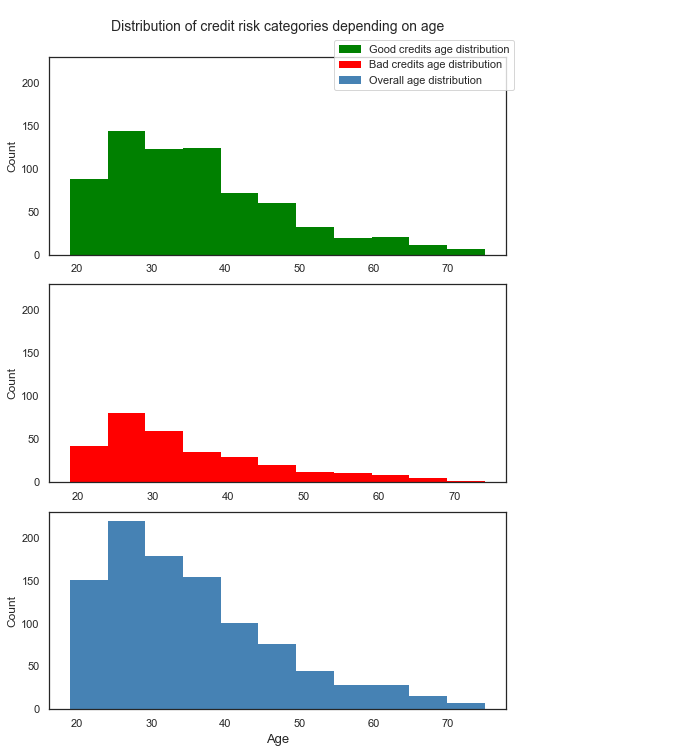

In [17]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax1.set_title('Distribution of credit risk categories depending on age', y=1.1, fontsize=14)
df[df['credit_risk'] == 'good']['age'].hist(ax=ax1, color='green', bins=11, edgecolor='none')
ax1.set_ylim(0, 230)
ax1.grid(False)
ax1.set_ylabel('Count')
df[df['credit_risk'] == 'bad']['age'].hist(ax=ax2, color='red', bins=11, edgecolor='none')
ax2.set_ylim(0, 230)
ax2.grid(False)
ax2.set_ylabel('Count')
df[['age', 'credit_risk']].hist(ax=ax3, color='steelblue', bins=11, edgecolor='none')
ax3.set_title('')
ax3.grid(False)
ax3.set_ylim(0, 230)
ax3.set_ylabel('Count')
plt.title('Age', y=-0.2, fontsize=13)
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.15)
label = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution']
plt.figlegend(labels=label, loc = (0.48, 0.88))
plt.show();

По этому графику можно увидеть, что среди всех клиентов больше всего возрастной группы 25-30 лет, то же самое верно и для разбивки клиентов по оценке кредитного скоринга. За ними следуют категории клиентов, которым 30-35 лет, потом 35-40 лет, и дальше 20-25 лет. В целом, среди клиентов банка больше всего тех кому от 25 до 30 лет. 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

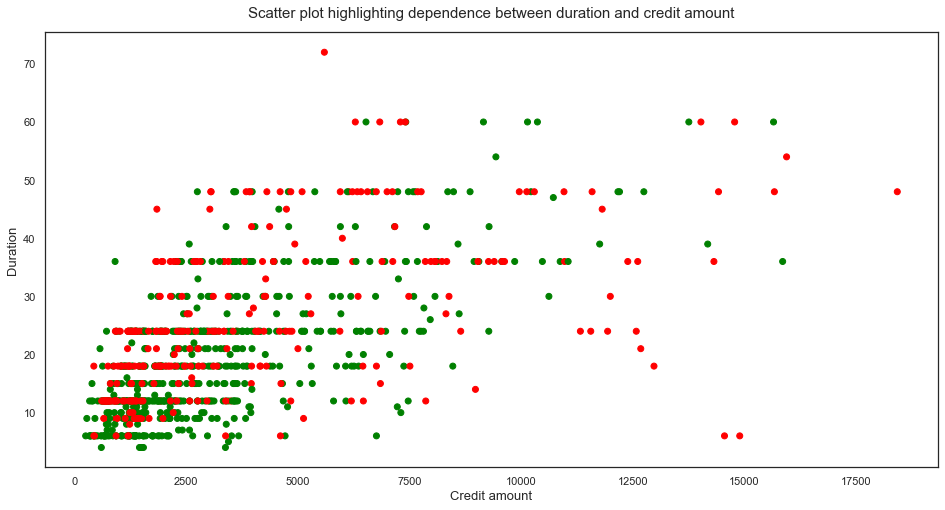

In [18]:
fig = plt.figure(figsize=(16, 8))
colors = {'good': 'green', 'bad':'red'}
plt.scatter(x=df['amount'],y=df['duration'], c=df['credit_risk'].map(colors))
plt.xlabel('Credit amount', fontsize=13)
plt.ylabel('Duration', fontsize=13)
plt.title('Scatter plot highlighting dependence between duration and credit amount', fontsize=15, y=1.02);

По диаграмме рассеяния можно сделать вывод о том, что клиентов с кредитом на свыше 10000 ден.ед. наблюдается крайне мало, тогда как клиентов у которых небольшой размер кредита и срок выплаты кредита до 40 больше всего среди клиентов с обоими типами кредитного риска.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

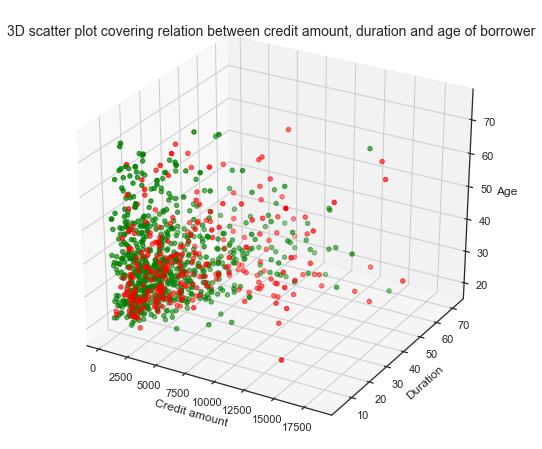

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (9, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'bad':'red', 'good': 'green'}
ax.scatter(xs=df['amount'], ys=df['duration'], zs=df['age'], c=df['credit_risk'].map(colors), marker='o')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.set_title('3D scatter plot covering relation between credit amount, duration and age of borrower', 
             fontsize=14);

Добавив ось возраста к диаграмме рассеяния, мы можем еще раз заметить, что больше всего клиентов, которым до 30 лет, что соответствует наблюдению из построенных раннее графиков.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [20]:
df = pd.get_dummies(df, columns=['foreign_worker', 'telephone'], drop_first=True)
# перекодируем бинарные признаки

In [21]:
df['credit_risk'] = df['credit_risk'].apply(lambda x: 1 if x=='bad' else 0)
# перекодируем отдельно кредитный риск, чтобы 1 соответствовал наличию кредит. риска, 0 - его отсутствию

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
labelencoder = LabelEncoder()
cats = ['number_credits', 'present_residence', 'installment_rate',
       'employment_duration', 'status', 'savings', 'people_liable']
for i in cats:
    df[i +'_cats'] = labelencoder.fit_transform(df[i])
df = df.drop(columns=cats)    
# перекодируем порядковые переменные, создав новые колонки, оканчивающиеся на "cats"
# и удалим изначальные колонки с порядковыми строковыми признаками

Избавимся от категориальных переменных 

In [24]:
labels = ['job', 'housing', 'purpose', 'property',
 'other_installment_plans', 'other_debtors',
 'credit_history', 'personal_status_sex']

df = pd.get_dummies(df, columns=labels, drop_first=False)

In [25]:
df

,duration,amount,age,credit_risk,foreign_worker_yes,telephone_yes (under customer name),number_credits_cats,present_residence_cats,installment_rate_cats,employment_duration_cats,...,other_debtors_none,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,personal_status_sex_female : non-single or male : single,personal_status_sex_female : single,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed
0,18,1049,21,0,0,0,0,3,2,2,...,1,1,0,0,0,0,1,0,0,0
1,9,2799,36,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
2,12,841,23,0,0,0,0,3,1,1,...,1,0,0,0,0,1,1,0,0,0
3,12,2122,39,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,12,2171,38,0,1,0,1,3,2,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,1,0,0,0,3,1,0,...,1,0,0,0,0,1,0,0,0,1
996,24,2303,45,1,0,0,0,2,2,3,...,0,0,0,0,0,1,0,0,0,1
997,21,12680,30,1,0,1,0,3,2,3,...,1,1,0,0,0,0,0,0,0,1
998,12,6468,52,1,0,1,0,2,1,4,...,1,0,0,0,0,1,0,0,0,1


Получили датасет со всеми признаками, имеющими числовое выражение.

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше! Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

Построим хитмэп, узнаем какие же признаки больше всего коррелируют с тем, что человек не отдаст долг.

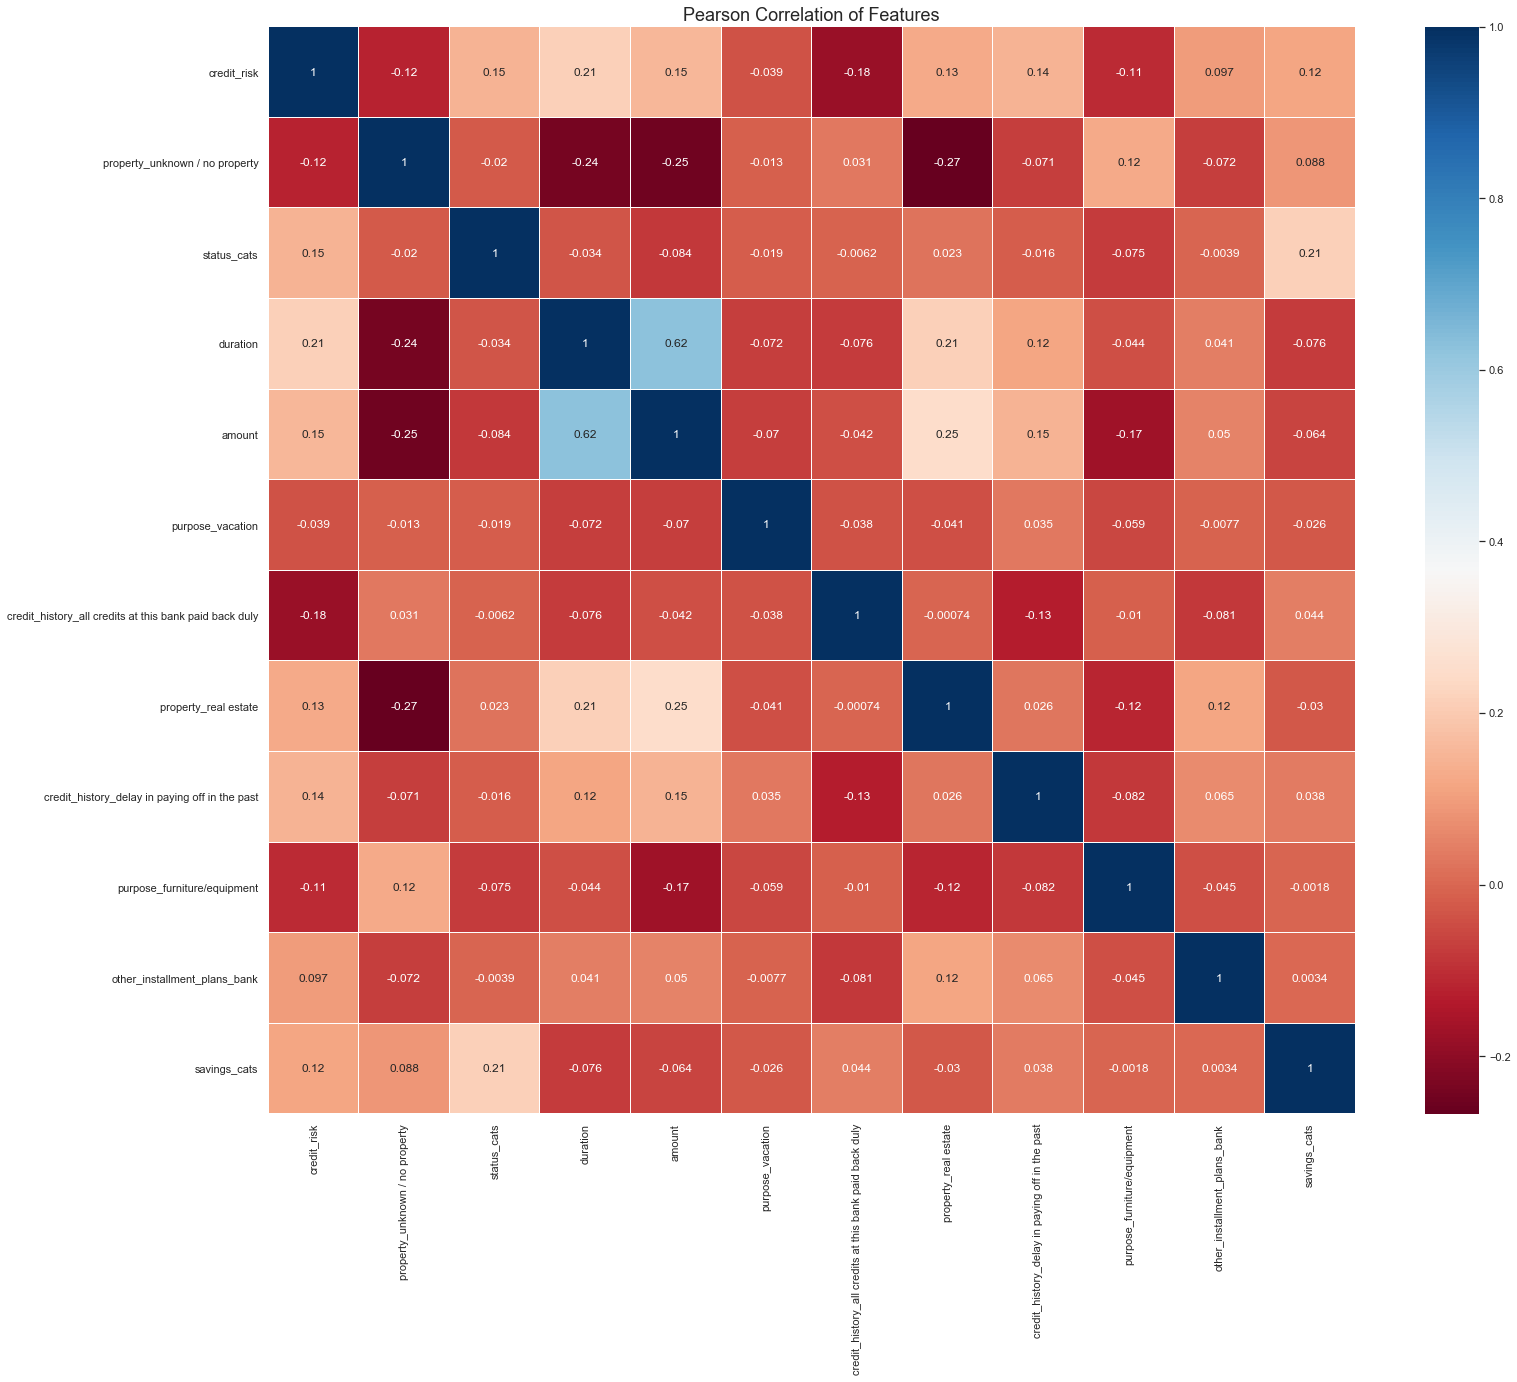

In [26]:
All = df[['credit_risk', 'property_unknown / no property','status_cats', 'duration', 'amount', 'purpose_vacation',
           'credit_history_all credits at this bank paid back duly','property_real estate', 'credit_history_delay in paying off in the past',
         'purpose_furniture/equipment','other_installment_plans_bank', 'savings_cats' ]]
colormap = plt.cm.RdBu
plt.figure(figsize=(25,20))
sns.heatmap(All.astype(float).corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', y=1.1, size=18, fontsize=18);

Отобрав признаки и создав новые, задаем функцию, которая будет предсказывать кредитный риск клиентов. 

In [27]:
def predict(Xtest: np.array) -> np.array:
    """
    Функция выдающая предсказания на основании линейной комбинации признаков
    """
    Xtest = Xtest.T
    x = (1000 - Xtest[0]) + 2*Xtest[1] + 4*(np.sin(Xtest[28]))**0.2 - 32*np.cos(Xtest[32]) + 0.4*(Xtest[39].mean()) +(0.8*Xtest[41]**3)**4 - 4*Xtest[23] + Xtest[33].mean()  
    pred = (x < 1).astype(int)
    return pred

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(f'AUC для train: {accuracy_score(y_train, predict(X_train))}')
print(f'AUC для test: {accuracy_score(y_test, predict(X_test))}')

AUC для train: 0.7133333333333334
AUC для test: 0.66


Доля верных ответов (accuracy) для тренировочной выборки выше (0.713), чем для тестовой (0.66), но в нашей выборке наблюдается дисбаланс классов, у 70% клиентов отсутствует кредитный риск, тогда как всего у 30% кредитный риск положительный. Поэтому измерение ошибки модели с помощью доли верных ответов (accuracy) не позволяет точно оценить качество модели.

In [28]:
df['credit_risk'].value_counts()

0    700
1    300
Name: credit_risk, dtype: int64

Создадим функцию которая просто по вектору, заполненному единицами, будет предсказывать кредитный риск. Доля верных ответов для такой неосмысленной модели на тестовой выборке тоже 0.66.

In [31]:
def predictor(Xtest: np.array) -> np.array:
    """
    Функция выдающая предсказания на основании единичного вектора
    """
    n = len(Xtest)
    Xtest = Xtest.T
    x = np.ones(n)
    pred = (x > 1).astype(int)
    return pred
print(f'AUC для train: {accuracy_score(y_train, predictor(X_train))}')
print(f'AUC для test: {accuracy_score(y_test, predictor(X_test))}')

AUC для train: 0.7133333333333334
AUC для test: 0.66
